In [2]:
using Plots
using LaTeXStrings
using LinearAlgebra

Para una carga puntual en movimiento, los potenciales de Liénard-Wiechert son
$$\phi(\vec{r};t)={\frac{1}{4\pi\epsilon_0}}{\frac{qc}{c|{\vec{r}-\vec{r}\ '}|-(\vec{r}-\vec{r}\ ')\cdot\vec{v}}},$$


$$\vec{A}(\vec{r};t)={\frac{\mu_0}{\pi}}{\frac{qc\vec{v}}{c|{\vec{r}-\vec{r}\ '}|-(\vec{r}-\vec{r}\ ')\cdot\vec{v}}}={\frac{\vec{v}}{c^2}}\phi(\vec{r};t) $$


In [3]:
function φ(r,q,tiempo,w,v)
    c=299792458
    ϵ=8.85e-12
    potencial=zeros(length(tiempo))
    for i in 1:length(tiempo)
        constante=(q*c)/(4*π*ϵ)
        t=tiempo[i]
        rp=w(t)
        vel=v(t)
        A=((r[1]-rp[1])^2+(r[2]-rp[2])^2+(r[3]-rp[3])^2)^(1/2)
        B=(r.-rp)
        C=B[1]*vel[1]+B[2]*vel[2]+B[3]*vel[3]
        potencial[i]=constante*(1/((c*A)-C))
    end
    return potencial
end

φ (generic function with 1 method)

Definiendo la función velocidad y posición de la carga.

In [31]:
w1(t)=[0.001*t,0,0]
v1(t)=[0.001,0,0]

v1 (generic function with 1 method)

La carga a considerar es de $1x10^{-11}C$ con un punto de observación de $\vec{r}=(0,0,0)$.

In [24]:
φ([0,1,0],1e-10,0,w1,v1)

1-element Array{Float64,1}:
 0.8991804694457365

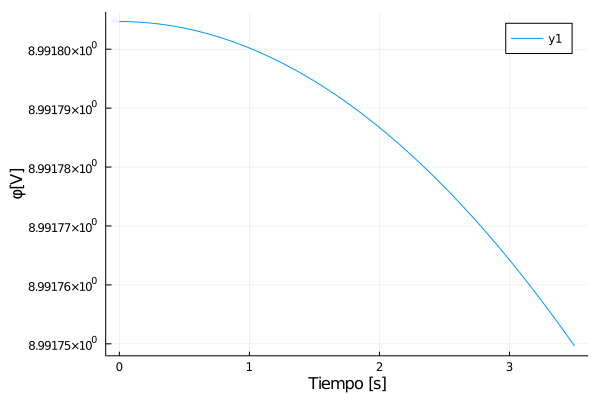

In [34]:
#Definiendo el tiempo donde se obtendrá φ
tiempo=collect(0.0:0.01:3.5)
plot(tiempo,φ([0,1,0],1e-9,tiempo,w1,v1),xlabel="Tiempo [s]",ylabel="φ[V]")

Comparación del potencial tomando diferentes puntos de observación.

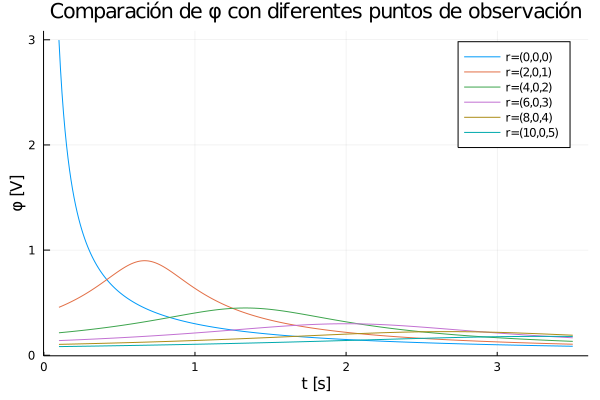

In [34]:
obs=collect(0:1:5)
plot(title="Comparación de φ con diferentes puntos de observación",xlabel="t [s]",ylabel="φ [V]")
for i in obs
    plot!(tiempo,φ([i*2,0,i],1e-10,tiempo,w1,v1),label="r=($(i*2),0,$(i))")
end
plot!()

In [27]:
function N_A(r,q,tiempo,w,v)
    A=zeros(length(tiempo))
    c=299792458
    μ=4e-7
    P=φ(r,q,tiempo,w,v)
    for i in 1:length(tiempo)
        t=tiempo[i]
        vel=v(t)
        nv=sqrt(vel[1]^2+vel[2]^2+vel[3]^2)
        A[i]=((μ*nv)/c^2)*abs(P[i])
    end
    return A
end 

N_A (generic function with 1 method)

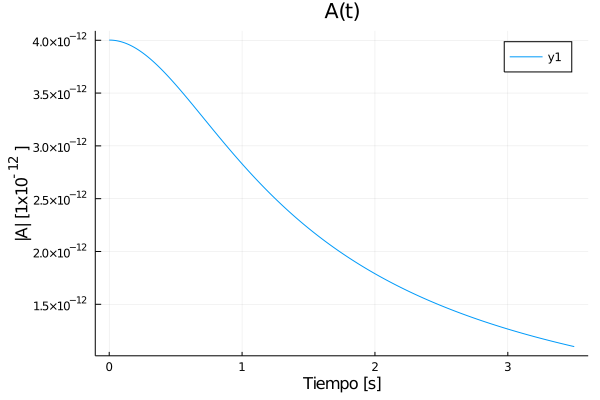

In [28]:
plot(title="A(t)",xlabel="Tiempo [s]",ylabel="|A| [1x10^{-12} ]")
plot!(tiempo,(1e12)*(N_A([0,2,0],1e-10,tiempo,w1,v1)),lw=1)

In [ ]:
Obteniendo la norma del potencial vectorial magnético con diversos puntos de observación.

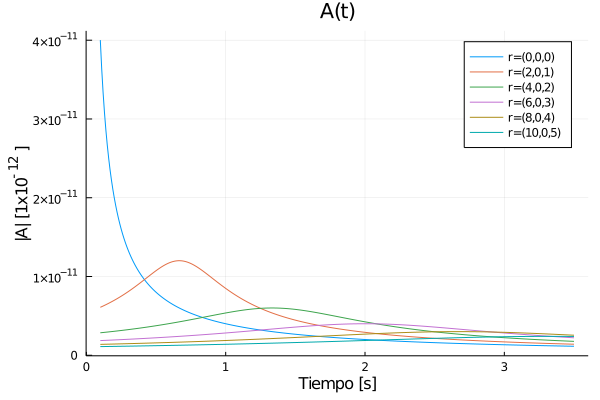

In [49]:
obs=collect(0:1:5)
plot(title="A(t)",xlabel="Tiempo [s]",ylabel="|A| [1x10^{-12} ]")
for i in obs
    plot!(tiempo,(1e12)*(N_A([i*2,0,i],1e-10,tiempo,w1,v1)),label="r=($(i*2),0,$(i))")
end
plot!()